In [1]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import SGD   
##from tensorflow.keras.optimizers import SGD
#from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

#Libraries for Saving the Model
from pickle import dump
from pickle import load

C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
#!pip install pandas_datareader

In [3]:
dataset = pd.read_excel(r'C:\Users\ratho\Desktop\MMA subs\823\Class\XMMA823_AssignmentData_topost.xlsx')

In [4]:
dataset

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
0,2017-07-18,33.482319,34.465744,50.064999,976.619995,137.422821,30.548828,76.522003,26.870838,53.836395,...,16.140646,63.823997,199.325455,208.325409,2434.50,21397.29,10.48,111.36,1.2659,1.1148
1,2017-07-19,34.008343,34.619576,50.187000,986.090027,137.280762,30.557764,76.690002,26.957619,54.107803,...,16.183868,64.019783,202.829193,207.332001,2438.30,21394.76,10.02,111.26,1.2727,1.1196
2,2017-07-20,33.785179,34.510723,49.699001,972.090027,136.677109,30.843687,75.498001,26.855061,53.954002,...,16.382711,63.853378,202.838623,209.080063,2439.07,21409.55,9.90,111.48,1.2732,1.1196
3,2017-07-21,31.489799,34.016071,48.839001,948.090027,136.464066,30.566696,72.473999,26.642052,53.338821,...,16.261677,62.110935,201.868484,203.597061,2419.38,21310.66,11.06,112.42,1.2791,1.1300
4,2017-07-22,32.023800,34.513088,49.516499,961.010010,136.978943,30.897297,74.248001,26.626272,53.537861,...,16.252941,62.022831,204.524536,204.036484,2440.69,21454.61,10.03,112.18,1.2936,1.1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2020-08-27,112.766838,179.836319,169.669495,2958.129883,265.285767,57.430000,1093.939941,58.278038,112.848961,...,17.453543,155.113174,255.381592,554.017944,4791.19,36302.38,17.68,114.85,1.3438,1.1329
1137,2020-08-28,112.995125,178.799164,170.660995,2933.739990,264.929749,57.110001,1088.469971,57.106567,114.182762,...,17.453543,154.843491,255.570953,554.574707,4786.35,36398.21,17.54,114.75,1.3432,1.1314
1138,2020-08-29,114.146523,178.888916,169.201004,2933.100098,265.533020,57.230000,1086.189941,56.683266,114.983032,...,17.453543,155.193085,256.617401,559.178162,4793.06,36488.63,16.95,114.97,1.3475,1.1337
1139,2020-08-30,112.935577,177.712143,168.644501,2924.010010,264.267120,58.130001,1070.339966,57.490494,114.844719,...,17.523436,154.803528,257.683777,554.216675,4778.73,36398.08,17.33,115.17,1.3500,1.1318


In [5]:
pd.set_option('display.width', 100)
dataset.head(4)

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
0,2017-07-18,33.482319,34.465744,50.064999,976.619995,137.422821,30.548828,76.522003,26.870838,53.836395,...,16.140646,63.823997,199.325455,208.325409,2434.50,21397.29,10.48,111.36,1.2659,1.1148
1,2017-07-19,34.008343,34.619576,50.187000,986.090027,137.280762,30.557764,76.690002,26.957619,54.107803,...,16.183868,64.019783,202.829193,207.332001,2438.30,21394.76,10.02,111.26,1.2727,1.1196
2,2017-07-20,33.785179,34.510723,49.699001,972.090027,136.677109,30.843687,75.498001,26.855061,53.954002,...,16.382711,63.853378,202.838623,209.080063,2439.07,21409.55,9.90,111.48,1.2732,1.1196
3,2017-07-21,31.489799,34.016071,48.839001,948.090027,136.464066,30.566696,72.473999,26.642052,53.338821,...,16.261677,62.110935,201.868484,203.597061,2419.38,21310.66,11.06,112.42,1.2791,1.1300


In [6]:
# types
pd.set_option('display.max_rows', 500)
dataset.dtypes

Date       datetime64[ns]
MMAX              float64
AAPL              float64
AMZN              float64
GOOGL             float64
MCD               float64
GM                float64
TSLA              float64
PFE               float64
SBUX              float64
TWTR              float64
VZ                float64
WYNN              float64
KHC               float64
JNJ               float64
HST               float64
HLT               float64
FDX               float64
DPZ               float64
SP500             float64
DJIA              float64
VIXCLS            float64
DEXJPUS           float64
DEXUSUK           float64
DEXUSEU           float64
dtype: object

In [7]:
# describe data
pd.set_option('display.precision', 3)
dataset.describe()

,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,TWTR,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
count,1140.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,...,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000,1141.000
mean,51.889,77.529,110.517,1501.854,184.053,38.962,270.494,34.028,76.589,38.790,...,16.119,92.773,208.264,311.155,3199.769,27469.424,19.125,107.714,1.298,1.141
std,19.423,40.885,41.437,580.061,32.897,10.191,306.709,5.557,22.282,14.073,...,2.431,22.529,50.471,98.619,647.573,4045.448,8.920,13.522,0.168,0.146
min,24.667,33.779,46.930,919.460,130.138,16.800,35.794,24.854,44.818,15.750,...,9.046,55.876,88.323,161.550,2237.400,18591.930,9.140,0.000,0.000,0.000
25%,40.212,42.849,81.842,1102.100,152.196,33.116,61.218,29.806,53.681,30.030,...,15.522,76.053,161.192,239.020,2727.720,24746.210,13.200,107.330,1.283,1.124
50%,46.412,54.963,94.158,1232.590,182.775,36.273,71.034,33.451,73.764,35.020,...,16.713,86.501,214.586,276.319,2930.750,26287.440,16.980,109.400,1.312,1.161
75%,55.491,119.205,158.074,1728.230,205.730,41.210,449.760,36.028,92.878,45.300,...,17.615,108.200,245.491,379.504,3567.790,29423.310,22.100,111.280,1.357,1.186
max,114.147,179.836,186.570,2996.770,265.533,64.610,1229.910,60.296,123.533,77.630,...,20.121,155.812,311.902,561.097,4793.060,36488.630,82.690,115.340,1.433,1.249


In [8]:
def series_to_supervised(data, lag=1):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)    
    cols, names = list(), list()
    for i in range(lag, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg = pd.DataFrame(data.iloc[:,1]).join(agg)
    agg.dropna(inplace=True)
    return agg

In [9]:
dataset= series_to_supervised(dataset,1)


In [20]:
dataset.drop('MMAX(t-1)', axis=1, inplace=True)

In [21]:
dataset

,MMAX,AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),TWTR(t-1),...,HST(t-1),HLT(t-1),FDX(t-1),DPZ(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1)
1,34.008,34.466,50.065,976.62,137.423,30.549,76.522,26.871,53.836,18.15,...,16.141,63.824,199.325,208.325,2434.50,21397.29,10.48,111.36,1.266,1.115
2,33.785,34.620,50.187,986.09,137.281,30.558,76.690,26.958,54.108,18.50,...,16.184,64.020,202.829,207.332,2438.30,21394.76,10.02,111.26,1.273,1.120
3,31.490,34.511,49.699,972.09,136.677,30.844,75.498,26.855,53.954,18.29,...,16.383,63.853,202.839,209.080,2439.07,21409.55,9.90,111.48,1.273,1.120
4,32.024,34.016,48.839,948.09,136.464,30.567,72.474,26.642,53.339,18.12,...,16.262,62.111,201.868,203.597,2419.38,21310.66,11.06,112.42,1.279,1.130
5,31.012,34.513,49.516,961.01,136.979,30.897,74.248,26.626,53.538,17.95,...,16.253,62.023,204.525,204.036,2440.69,21454.61,10.03,112.18,1.294,1.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,110.593,175.159,171.037,2928.30,262.022,56.080,1008.870,58.623,110.399,43.90,...,17.184,152.566,249.113,531.766,4696.56,35753.89,18.63,114.22,1.335,1.132
1136,112.767,175.797,171.068,2938.33,263.021,56.910,1067.000,57.796,111.021,44.16,...,17.324,154.534,252.960,542.713,4725.79,35950.56,17.96,114.42,1.341,1.132
1137,112.995,179.836,169.669,2958.13,265.286,57.430,1093.940,58.278,112.849,44.33,...,17.454,155.113,255.382,554.018,4791.19,36302.38,17.68,114.85,1.344,1.133
1138,114.147,178.799,170.661,2933.74,264.930,57.110,1088.470,57.107,114.183,43.43,...,17.454,154.843,255.571,554.575,4786.35,36398.21,17.54,114.75,1.343,1.131


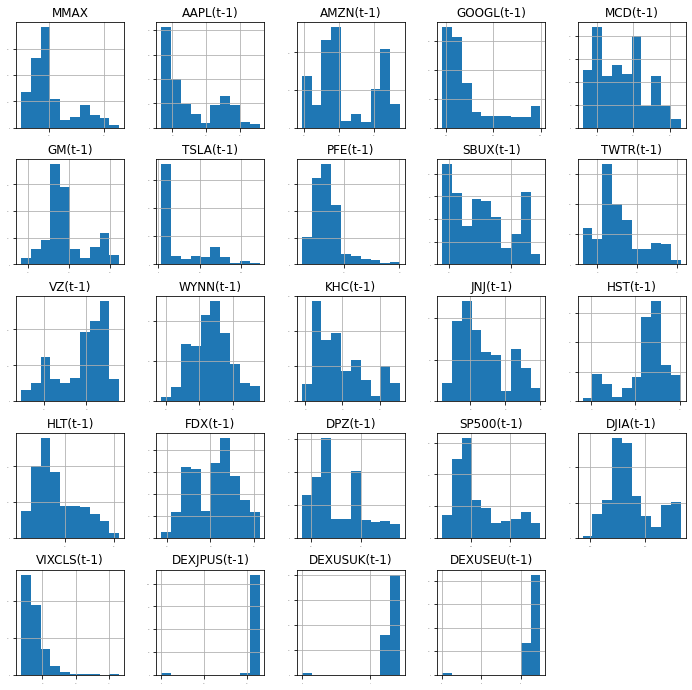

In [22]:
#Visualization
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

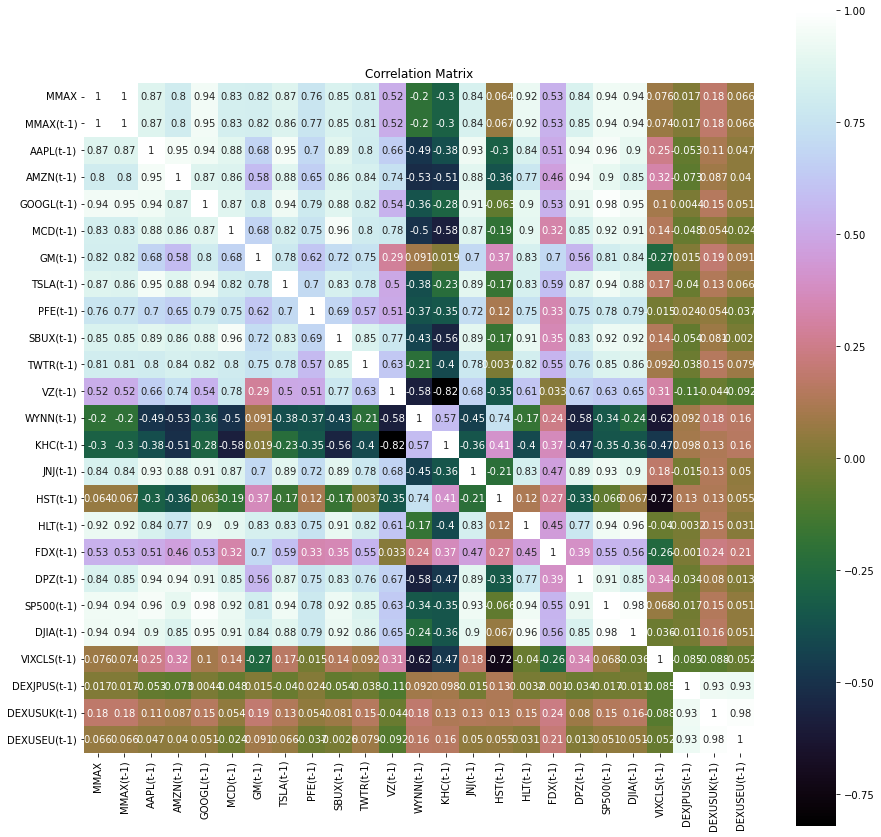

In [18]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

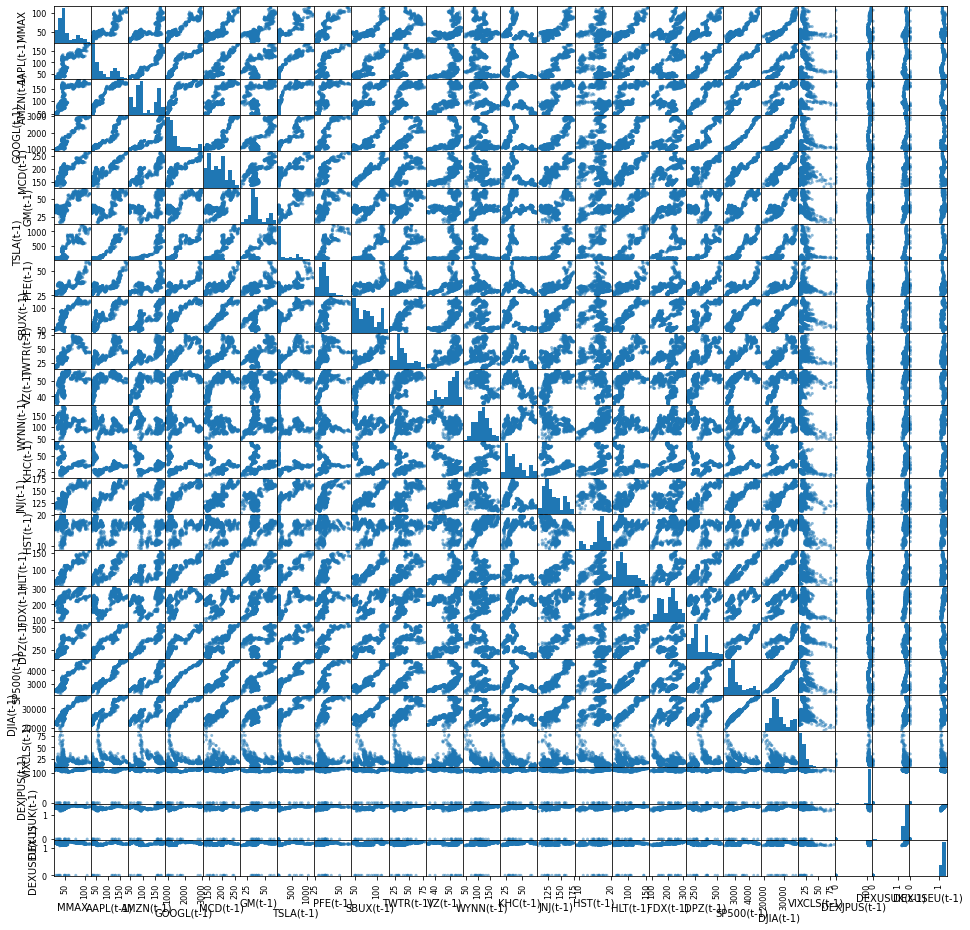

In [23]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(16,16))
plt.show()

In [25]:
# describe data
pd.set_option('display.precision', 3)
dataset.describe()

,MMAX,AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),TWTR(t-1),...,HST(t-1),HLT(t-1),FDX(t-1),DPZ(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1)
count,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,...,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000,1139.000
mean,51.905,77.354,110.416,1499.381,183.911,38.928,269.102,33.987,76.521,38.781,...,16.117,92.663,208.177,310.723,3197.007,27453.798,19.128,107.802,1.299,1.142
std,19.424,40.705,41.404,577.553,32.751,10.167,305.169,5.472,22.243,14.083,...,2.432,22.396,50.472,98.162,644.773,4031.749,8.928,13.150,0.164,0.142
min,24.667,33.779,46.930,919.460,130.138,16.800,35.794,24.854,44.818,15.750,...,9.046,55.876,88.323,161.550,2237.400,18591.930,9.140,0.000,0.000,0.000
25%,40.246,42.842,81.831,1101.860,152.192,33.116,61.214,29.806,53.668,30.020,...,15.522,76.023,161.090,239.019,2727.260,24742.870,13.195,107.335,1.283,1.124
50%,46.413,54.902,94.131,1232.220,182.720,36.203,71.002,33.442,73.738,34.990,...,16.712,86.459,214.471,276.140,2930.320,26287.030,16.970,109.400,1.312,1.161
75%,55.512,119.101,158.050,1727.590,205.643,41.179,449.135,36.019,92.664,45.315,...,17.625,108.096,245.458,379.287,3554.020,29409.500,22.115,111.280,1.357,1.186
max,114.147,179.836,186.570,2996.770,265.533,64.610,1229.910,60.296,123.533,77.630,...,20.121,155.193,311.902,559.178,4793.060,36488.630,82.690,115.340,1.433,1.249


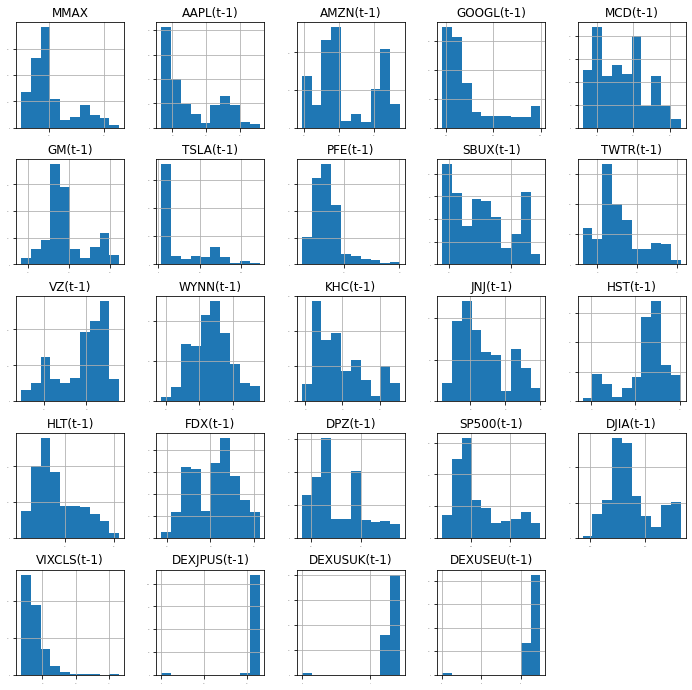

In [26]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

C:\Users\ratho\AppData\Local\Temp\ipykernel_10192\2074106455.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  res = sm.tsa.seasonal_decompose(Y,freq=252)


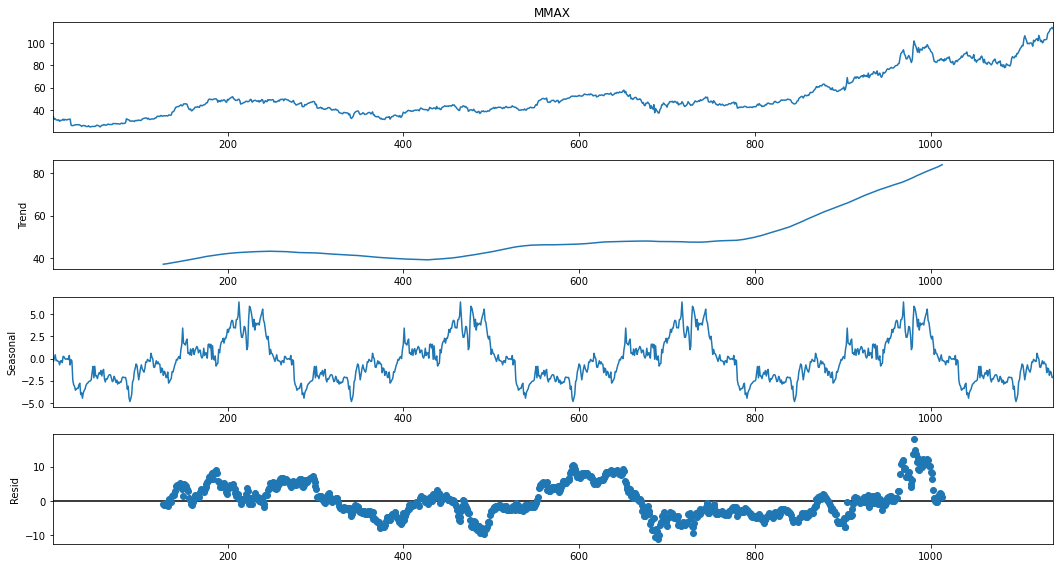

In [27]:
Y= dataset["MMAX"]
res = sm.tsa.seasonal_decompose(Y,freq=252)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [29]:
#Feature Selection

Y= dataset["MMAX"]
X = dataset.loc[:, dataset.columns != 'MMAX']




In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_regression

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
GOOGL(t-1),9418.703
SP500(t-1),8898.210
DJIA(t-1),7941.537
HLT(t-1),6131.935
TSLA(t-1),3405.224
AAPL(t-1),3387.397
SBUX(t-1),2935.471
DPZ(t-1),2837.524
JNJ(t-1),2764.251


In [31]:
fit.pvalues_

array([0.00000000e+000, 2.42987466e-256, 0.00000000e+000, 2.99828164e-285,
       2.67744974e-280, 0.00000000e+000, 1.74561373e-219, 2.75698611e-317,
       9.45074055e-265, 2.01866674e-080, 1.73687678e-011, 4.98078748e-025,
       1.11958326e-306, 3.03670160e-002, 0.00000000e+000, 1.63179037e-084,
       2.83947385e-311, 0.00000000e+000, 0.00000000e+000, 9.93892941e-003,
       5.64215461e-001, 1.64455841e-009, 2.49074620e-002])

In [ ]:
#Data transformation

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
rescaledX.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.005,0.022,0.028,0.054,0.288,0.034,0.057,0.115,0.039,0.069,...,0.641,0.080,0.496,0.118,0.077,0.157,0.018,0.965,0.883,0.893
1,0.006,0.023,0.032,0.053,0.288,0.034,0.059,0.118,0.044,0.068,...,0.645,0.082,0.512,0.115,0.079,0.157,0.012,0.965,0.888,0.897
2,0.005,0.020,0.025,0.048,0.294,0.033,0.056,0.116,0.041,0.080,...,0.662,0.080,0.512,0.120,0.079,0.157,0.010,0.967,0.888,0.897
3,0.002,0.014,0.014,0.047,0.288,0.031,0.050,0.108,0.038,0.048,...,0.652,0.063,0.508,0.106,0.071,0.152,0.026,0.975,0.892,0.905
4,0.005,0.019,0.020,0.051,0.295,0.032,0.050,0.111,0.036,0.048,...,0.651,0.062,0.520,0.107,0.080,0.160,0.012,0.973,0.903,0.910


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
StandardisedX.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.054,-1.458,-0.906,-1.420,-0.824,-0.631,-1.301,-1.020,-1.466,-2.246,...,0.010,-1.288,-0.175,-1.044,-1.183,-1.503,-0.969,0.271,-0.204,-0.192
1,-1.050,-1.455,-0.889,-1.424,-0.824,-0.631,-1.285,-1.008,-1.441,-2.250,...,0.028,-1.280,-0.106,-1.054,-1.177,-1.503,-1.021,0.263,-0.162,-0.158
2,-1.053,-1.467,-0.913,-1.443,-0.795,-0.635,-1.304,-1.015,-1.456,-2.199,...,0.109,-1.287,-0.106,-1.036,-1.176,-1.500,-1.034,0.280,-0.159,-0.158
3,-1.065,-1.488,-0.955,-1.449,-0.823,-0.645,-1.343,-1.043,-1.468,-2.328,...,0.060,-1.365,-0.125,-1.092,-1.207,-1.524,-0.904,0.351,-0.123,-0.085
4,-1.053,-1.472,-0.933,-1.434,-0.790,-0.639,-1.346,-1.034,-1.480,-2.328,...,0.056,-1.369,-0.072,-1.087,-1.174,-1.489,-1.019,0.333,-0.034,-0.040


In [34]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
NormalizedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
NormalizedX.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.002,0.002,0.045,0.006,0.001,0.004,0.001,0.002,8.418e-04,0.002,...,7.486e-04,0.003,0.009,0.010,0.113,0.992,4.861e-04,0.005,5.871e-05,5.170e-05
1,0.002,0.002,0.046,0.006,0.001,0.004,0.001,0.003,8.581e-04,0.002,...,7.507e-04,0.003,0.009,0.010,0.113,0.992,4.648e-04,0.005,5.903e-05,5.193e-05
2,0.002,0.002,0.045,0.006,0.001,0.003,0.001,0.003,8.478e-04,0.002,...,7.594e-04,0.003,0.009,0.010,0.113,0.992,4.589e-04,0.005,5.902e-05,5.190e-05
3,0.002,0.002,0.044,0.006,0.001,0.003,0.001,0.002,8.439e-04,0.002,...,7.573e-04,0.003,0.009,0.009,0.113,0.992,5.151e-04,0.005,5.957e-05,5.263e-05
4,0.002,0.002,0.044,0.006,0.001,0.003,0.001,0.002,8.303e-04,0.002,...,7.518e-04,0.003,0.009,0.009,0.113,0.992,4.640e-04,0.005,5.984e-05,5.257e-05


In [36]:
# split out validation dataset for the end

test_size = 0.2

seed = 7

train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [37]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
#scoring = 'r2'

In [38]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
models.append(('MLP', MLPRegressor()))

In [39]:
#Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [40]:
names = []
kfold_results = []
test_results = []
train_results = []

print("Model,\t CrossValMean,\t CrossValSTD,\t train_MSE,\t test_MSE")
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: \t  %f \t  (%f) \t   %f \t   %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Model,	 CrossValMean,	 CrossValSTD,	 train_MSE,	 test_MSE
LR: 	  6.406329 	  (1.053412) 	   5.975299 	   571.223422
LASSO: 	  7.869500 	  (1.559397) 	   7.577659 	   199.511904
EN: 	  7.241218 	  (1.497952) 	   6.903659 	   284.205776
KNN: 	  8.441995 	  (2.566692) 	   4.595037 	   918.260456
CART: 	  3.847812 	  (1.893179) 	   0.000000 	   613.198515
SVR: 	  34.856108 	  (2.933732) 	   33.422888 	   880.311058


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ratho\anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLP: 	  70.628064 	  (47.594162) 	   50.515059 	   2144.047902
ABR: 	  4.775360 	  (0.875022) 	   4.019866 	   736.470510
GBR: 	  2.427351 	  (0.690455) 	   0.940527 	   691.177895
RFR: 	  1.929373 	  (1.056193) 	   0.272546 	   789.025145
ETR: 	  1.088726 	  (0.335422) 	   0.000000 	   738.938333


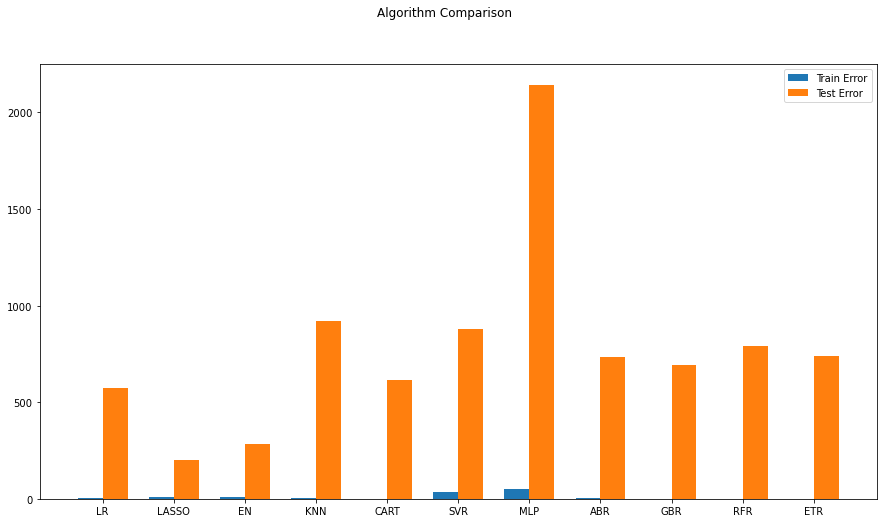

In [41]:
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

In [42]:
#Preparing data for the ARIMAX Model, seperating endogeneous and exogenous variables
X_train_ARIMA=X_train
X_test_ARIMA=X_test
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [43]:
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])

model_fit = modelARIMA.fit()
#print(model_fit.summary())

error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)

#add 

test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)

names.append("ARIMA")
print('ARIMA test error:\t',error_Test_ARIMA)
print('ARIMA train error:\t',error_Training_ARIMA)

C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

ARIMA test error:	 520.6735143696475
ARIMA train error:	 1.126803087703901


C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ratho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [46]:
import warnings
warnings.filterwarnings('ignore')
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()   
    #error on the test set
#     tr_len = len(X_train_ARIMA)
#     to_len = len(X_train_ARIMA) + len(X_test_ARIMA)
#     predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
#     error = mean_squared_error(predicted, Y_test)
    # error on the training set 
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = range(0, 5)
q_values = range(0, 12)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)    

ARIMA(0, 0, 0) MSE=5.9752992
ARIMA(0, 0, 1) MSE=3.6830517
ARIMA(0, 0, 2) MSE=2.5466333
ARIMA(0, 0, 3) MSE=2.1617302
ARIMA(0, 0, 4) MSE=1.8687219
ARIMA(0, 0, 5) MSE=1.6777052
ARIMA(0, 0, 6) MSE=1.5919593
ARIMA(0, 0, 7) MSE=1.5208156
ARIMA(0, 0, 8) MSE=1.4938462
ARIMA(0, 0, 9) MSE=1.3981648
ARIMA(0, 0, 10) MSE=1.3652715
ARIMA(0, 0, 11) MSE=1.3249810
ARIMA(1, 0, 0) MSE=1.1268031
ARIMA(2, 0, 0) MSE=1.1373655
ARIMA(3, 0, 0) MSE=1.1292070
Best ARIMA(1, 0, 0) MSE=1.1268031


In [ ]:
#Due to huge amount of MSE error we will proceed with FacebookProphet and not use ARIMA